**IMAGE** **AUGUMENTATION**

In [1]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import splitfolders
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/drive/MyDrive/flowers", output="/content/drive/MyDrive/flowers",seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) 

Copying files: 4317 files [01:17, 55.49 files/s] 


In [4]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [13]:
def getdata():
  train_datagen=ImageDataGenerator (rescale=1./255,
  shear_range=0.2,
  rotation_range=180,
  zoom_range=0.2,
  horizontal_flip=True)
  test_datagen=ImageDataGenerator (rescale=1./255)
  x_train = train_datagen.flow_from_directory (r'/content/drive/MyDrive/flowers/train', target_size = (64,64), batch_size = 32, class_mode= 'categorical')
  x_test = test_datagen.flow_from_directory(r'/content/drive/MyDrive/flowers/test', target_size = (64,64), batch_size = 32, class_mode= 'categorical')
  return x_train,x_test;

**CREATE** **MODEL**

In [6]:
#To define linear intialisan
from keras.models import Sequential
#To add Layers import Dense
from keras.layers import Dense
#To create Convolution kernel import Convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import Flatten Layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [7]:
model=Sequential()

**ADDING** **LAYERS**

In [8]:
#add convolutional layer 
model.add(Convolution2D(112, (7,7),input_shape=(64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [9]:
#add hidden layer 
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))

**COMPILE** **THE** **MODEL**

In [10]:
#add output Layer 
model.add(Dense(5, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 112)       16576     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 112)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 94192)             0         
                                                                 
 dense (Dense)               (None, 32)                3014176   
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                        

**FIT** **THE** **MODEL**

In [14]:
x_train,x_test=getdata()
tom=model.fit_generator(x_train , steps_per_epoch=len(x_train), epochs=100, validation_data=x_test, validation_steps=len(x_test))

Found 3452 images belonging to 5 classes.
Found 435 images belonging to 5 classes.
Epoch 1/100
108/108 [==============================] - 45s 407ms/step - loss: 1.4229 - accuracy: 0.3827 - val_loss: 1.2983 - val_accuracy: 0.4368
Epoch 2/100
108/108 [==============================] - 41s 383ms/step - loss: 1.2115 - accuracy: 0.4780 - val_loss: 1.1736 - val_accuracy: 0.5034
Epoch 3/100
108/108 [==============================] - 42s 387ms/step - loss: 1.1918 - accuracy: 0.5046 - val_loss: 1.1473 - val_accuracy: 0.5379
Epoch 4/100
108/108 [==============================] - 42s 386ms/step - loss: 1.1423 - accuracy: 0.5330 - val_loss: 1.1095 - val_accuracy: 0.5471
Epoch 5/100
108/108 [==============================] - 42s 386ms/step - loss: 1.1290 - accuracy: 0.5406 - val_loss: 1.1051 - val_accuracy: 0.5517
Epoch 6/100
108/108 [==============================] - 42s 387ms/step - loss: 1.1000 - accuracy: 0.5576 - val_loss: 1.1469 - val_accuracy: 0.5103
Epoch 7/100
108/108 [====================

**SAVE** **THE** **MODEL**

In [15]:
model.save("/content/drive/MyDrive/flowermodel.h5")

**TEST** **THE** **MODEL**

In [16]:
import matplotlib.pyplot as plt

14/14 - 3s - loss: 1.0187 - accuracy: 0.6598 - 3s/epoch - 250ms/step


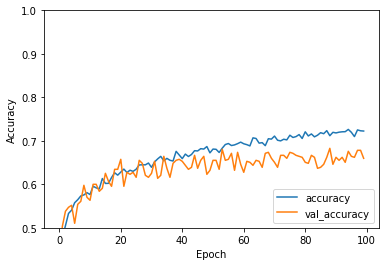

In [17]:
plt.plot(tom.history['accuracy'], label='accuracy')
plt.plot(tom.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, verbose=2)

In [18]:
print(test_acc)

0.659770131111145
